In [2]:
%run -n main.py

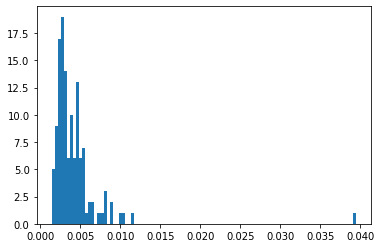

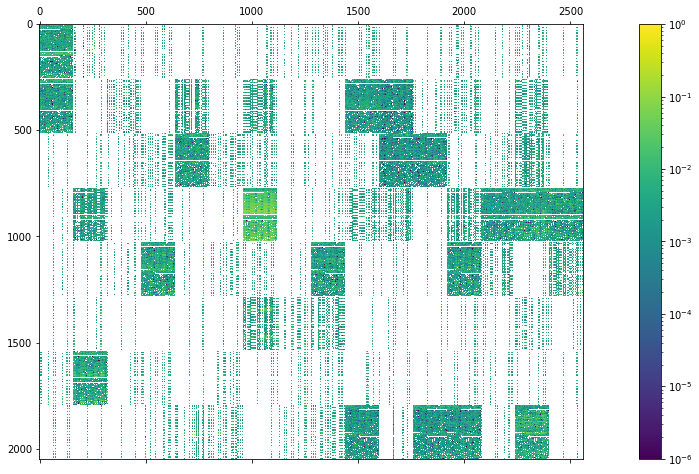

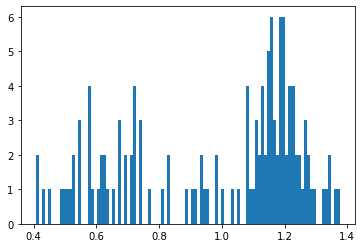

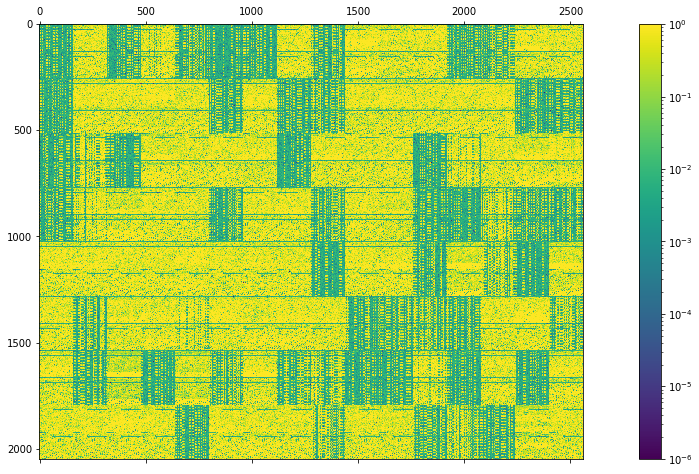

In [11]:
# Cf. https://github.com/official-stockfish/Stockfish/issues/3274 by ddobbelaere

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm


def visualize(infile):
    parameters = torch.load(infile, map_location=DEVICE)["model_state_dict"]
    t = parameters['embedding.weight'][:WIDTH1].numpy().T
    assert t.shape == (WIDTH2, WIDTH1)

    # Reshape embedding weight into blocks for each output
    num_blocks_h = 8
    num_blocks_w = 16
    block_h = 4 * 64
    block_w = 5 * 32
    assert t.shape[0] == num_blocks_h * num_blocks_w
    assert t.shape[1] == block_h * block_w
    t1 = t.reshape([num_blocks_h, num_blocks_w, block_h, block_w])
    t2 = t1.transpose((0, 2, 1, 3))
    t3 = t2.reshape([num_blocks_h * block_h, num_blocks_w * block_w])

    data = np.abs(t3)
    vmin = 0.000001
    vmax = 1
    
    # Plot standard deviation of weight for each output
    plt.hist(np.std(t, 1), bins=100)
    plt.show()

    # Plot embedding weight
    fig, ax = plt.subplots(figsize=(20, 8))
    fig.colorbar(ax.matshow(data, norm=LogNorm(vmin=vmin, vmax=vmax)))
    plt.show()


visualize('../data/ckpt-2021-01-13-07-41-04-epoch-20-loss-0.923-0.931.pt')
visualize('../data/ckpt-2021-01-21-05-10-04-epoch-35-acc-0.933-0.925-loss-0.715-0.794-lr-0.000125.pt')

  0%|          | 19/6059 [00:00<00:31, 189.00it/s]

:: Loading dataset


100%|██████████| 6059/6059 [00:20<00:00, 302.12it/s]


:: Computing statistics
count    9.926685e+07
mean     2.955922e+01
std      6.397895e+02
min     -3.000000e+03
25%     -2.590000e+02
50%      3.400000e+01
75%      3.240000e+02
max      2.999000e+03
dtype: float64
:: Plotting histogram


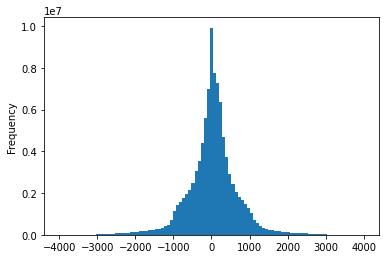

In [2]:
#
# Distribution of score in dataset
#
infile = "../data/gensfen-100000000-383847020.halfkp"
plot_statistics(infile, batch_size=2 ** 14)

:: Loading checkpoint (../data/ckpt-2021-01-11-14-49-22-epoch-32-loss-0.934-0.93.pt)
:: Plotting histograms
:: [l1.weight]
count    1.048576e+07
mean    -3.056470e-06
std      1.506523e-03
min     -9.872617e-02
25%     -1.014928e-04
50%     -1.961818e-44
75%      9.501889e-05
max      9.479324e-02
dtype: float64


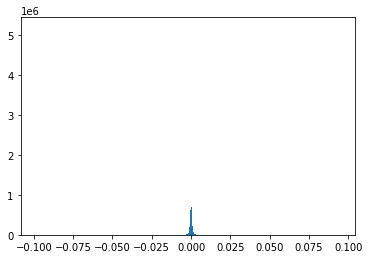

:: [l1.bias]
count    256.000000
mean       0.001074
std        0.006894
min       -0.021166
25%       -0.001781
50%        0.000135
75%        0.003168
max        0.068569
dtype: float64


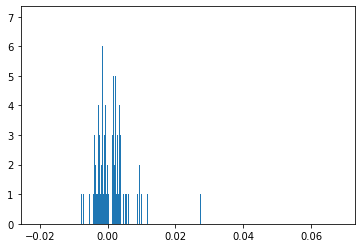

:: [l2.weight]
count    1.638400e+04
mean     1.099655e-04
std      3.724486e-02
min     -9.169798e-01
25%     -1.071630e-02
50%      1.167282e-42
75%      1.061598e-02
max      9.247794e-01
dtype: float64


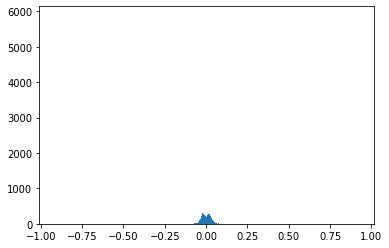

:: [l2.bias]
count    3.200000e+01
mean     5.371486e-02
std      4.615559e-02
min     -3.688218e-42
25%      7.052486e-40
50%      5.844999e-02
75%      8.970491e-02
max      1.331961e-01
dtype: float64


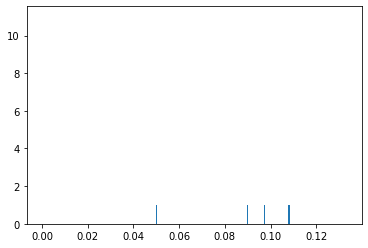

:: [l3.weight]
count    1.024000e+03
mean     6.711049e-03
std      1.470894e-01
min     -3.801274e-01
25%     -8.855372e-02
50%     -6.614129e-43
75%      8.934929e-02
max      4.243861e-01
dtype: float64


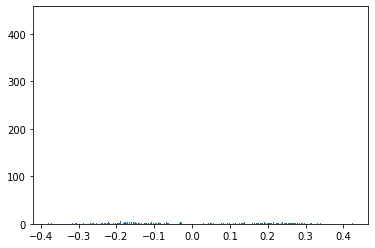

:: [l3.bias]
count    3.200000e+01
mean     1.372685e-01
std      6.201086e-02
min      4.312776e-41
25%      1.356887e-01
50%      1.540787e-01
75%      1.668198e-01
max      2.306145e-01
dtype: float64


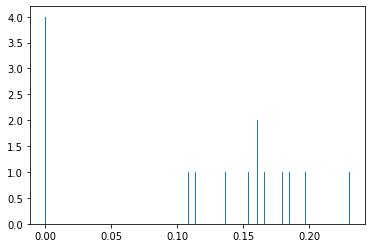

:: [l4.weight]
count    32.000000
mean      0.068574
std       0.854578
min      -1.251372
25%      -0.878086
50%       0.154405
75%       0.887467
max       0.996376
dtype: float64


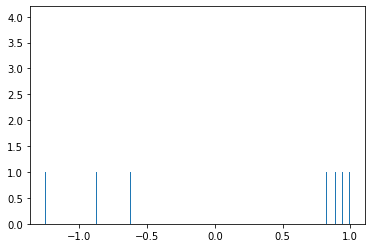

:: [l4.bias]
count    1.000000
mean    -0.007345
std           NaN
min     -0.007345
25%     -0.007345
50%     -0.007345
75%     -0.007345
max     -0.007345
dtype: float64


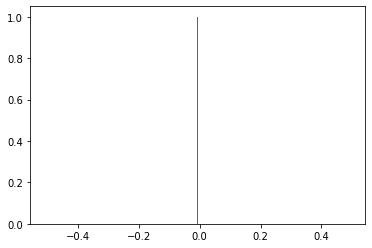

In [3]:
#
# Distribution of parameter values for each network later
#
infile = "../data/ckpt-2021-01-11-14-49-22-epoch-32-loss-0.934-0.93.pt"
plot_model_parameters(infile)